In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")
# Calculate normalized Shannon-Wiener index
df['normalized_shannon_index_TCR'] = df['shannon_index_TCR']/np.log(df['clonotype_count_TCR'])
df['normalized_shannon_index_tool'] = df['shannon_index_tool']/np.log(df['clonotype_count_tool'])
df['normalized_absolute_error'] = np.abs(df['normalized_shannon_index_TCR'] - df['normalized_shannon_index_tool'])
df

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,absolute_error,class,normalized_shannon_index_TCR,normalized_shannon_index_tool,normalized_absolute_error
0,SRR5233637,3.061608,24,MIXCR,7.712411,27947,polyclonal,small_intestine,T_cell_poor,4.650803,T_cell_poor_polyclonal,0.753308,0.963360,0.210052
1,SRR5233637,4.562193,115,IMREP,7.712411,27947,polyclonal,small_intestine,T_cell_poor,3.150218,T_cell_poor_polyclonal,0.753308,0.961488,0.208180
2,SRR5233637,4.309543,118,TRUST4,7.712411,27947,polyclonal,small_intestine,T_cell_poor,3.402869,T_cell_poor_polyclonal,0.753308,0.903338,0.150031
3,SRR5233639,5.478183,353,MIXCR,10.059157,202869,polyclonal,lymph_node,T_cell_rich,4.580975,T_cell_rich_polyclonal,0.823150,0.933813,0.110662
4,SRR5233639,7.548679,2342,IMREP,10.059157,202869,polyclonal,lymph_node,T_cell_rich,2.510478,T_cell_rich_polyclonal,0.823150,0.972923,0.149773
5,SRR5233639,7.186224,2362,TRUST4,10.059157,202869,polyclonal,lymph_node,T_cell_rich,2.872934,T_cell_rich_polyclonal,0.823150,0.925194,0.102043
6,sample01,0.829164,2592,MIXCR,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.243510,T_cell_rich_monoclonal,0.133972,0.105489,0.028483
7,sample01,1.163479,3682,IMREP,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.090805,T_cell_rich_monoclonal,0.133972,0.141694,0.007722
8,sample01,1.165598,4154,TRUST4,1.072675,3001,monoclonal,PBMC,T_cell_rich,0.092923,T_cell_rich_monoclonal,0.133972,0.139897,0.005925
9,sample02,0.988740,1565,MIXCR,1.001202,3229,monoclonal,PBMC,T_cell_rich,0.012462,T_cell_rich_monoclonal,0.123912,0.134419,0.010507


In [3]:
T_cell_poor_monoclonal = pd.read_csv("../summary_data/subsample/T_cell_poor_monoclonal_diversity.csv")
df_combined = pd.concat([df,T_cell_poor_monoclonal],ignore_index=True,sort=False)
df_combined

,Sample,shannon_index_tool,clonotype_count_tool,tool,shannon_index_TCR,clonotype_count_TCR,repertoire_type,tissue,tissue_type,absolute_error,class,normalized_shannon_index_TCR,normalized_shannon_index_tool,normalized_absolute_error
0,SRR5233637,3.061608,24,MIXCR,7.712411,27947.0,polyclonal,small_intestine,T_cell_poor,4.650803,T_cell_poor_polyclonal,0.753308,0.963360,0.210052
1,SRR5233637,4.562193,115,IMREP,7.712411,27947.0,polyclonal,small_intestine,T_cell_poor,3.150218,T_cell_poor_polyclonal,0.753308,0.961488,0.208180
2,SRR5233637,4.309543,118,TRUST4,7.712411,27947.0,polyclonal,small_intestine,T_cell_poor,3.402869,T_cell_poor_polyclonal,0.753308,0.903338,0.150031
3,SRR5233639,5.478183,353,MIXCR,10.059157,202869.0,polyclonal,lymph_node,T_cell_rich,4.580975,T_cell_rich_polyclonal,0.823150,0.933813,0.110662
4,SRR5233639,7.548679,2342,IMREP,10.059157,202869.0,polyclonal,lymph_node,T_cell_rich,2.510478,T_cell_rich_polyclonal,0.823150,0.972923,0.149773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,insilco_sample2,0.363360,1,IMREP,1.001202,NaN,monoclonal,NaN,T_cell_poor,0.637842,T_cell_poor_monoclonal,NaN,NaN,NaN
61,insilco_sample2,0.364596,1,TRUST4,1.001202,NaN,monoclonal,NaN,T_cell_poor,0.636605,T_cell_poor_monoclonal,NaN,NaN,NaN
62,insilco_sample3,0.452226,3,MIXCR,0.960516,NaN,monoclonal,NaN,T_cell_poor,0.508290,T_cell_poor_monoclonal,NaN,NaN,NaN
63,insilco_sample3,0.384446,2,IMREP,0.960516,NaN,monoclonal,NaN,T_cell_poor,0.576071,T_cell_poor_monoclonal,NaN,NaN,NaN


SDI comparison in T cell rich tissues

In [4]:
T_cell_rich = df_combined.loc[(df_combined['tissue_type'] == 'T_cell_rich')]

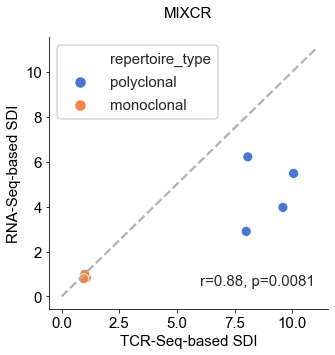

In [5]:
# MIXCR
T_cell_rich_MIXCR = T_cell_rich.loc[(T_cell_rich['tool'] == 'MIXCR')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=100, data=T_cell_rich_MIXCR, palette=['#4878d0', '#ee854a'])
g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")
    
g.axes.set_title('MIXCR',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
 
r, p = stats.pearsonr(T_cell_rich_MIXCR['shannon_index_TCR'], T_cell_rich_MIXCR['shannon_index_tool'])
plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)
    
fig = ax.get_figure()

fig.savefig("../figures/main/figure2_a1.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure2_a1.png",bbox_inches="tight")

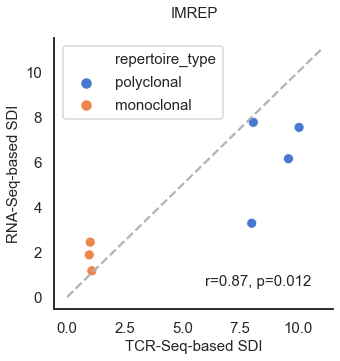

In [6]:
# IMREP
T_cell_rich_IMREP = T_cell_rich.loc[(T_cell_rich['tool'] == 'IMREP')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=100, data=T_cell_rich_IMREP, palette=['#4878d0', '#ee854a'])
g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")
    
g.axes.set_title('IMREP',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
 
r, p = stats.pearsonr(T_cell_rich_IMREP['shannon_index_TCR'], T_cell_rich_IMREP['shannon_index_tool'])
plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)
    
fig = ax.get_figure()

fig.savefig("../figures/main/figure2_a2.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure2_a2.png",bbox_inches="tight")

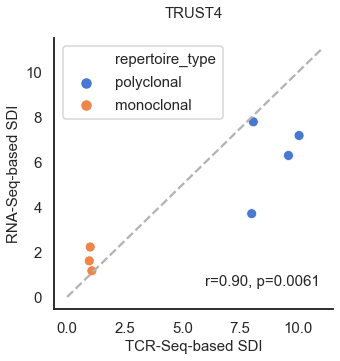

In [7]:
# TRUST4
T_cell_rich_TRUST4 = T_cell_rich.loc[(T_cell_rich['tool'] == 'TRUST4')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=100, data=T_cell_rich_TRUST4, palette=['#4878d0', '#ee854a'])
g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")
    
g.axes.set_title('TRUST4',fontsize=15,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
 
r, p = stats.pearsonr(T_cell_rich_TRUST4['shannon_index_TCR'], T_cell_rich_TRUST4['shannon_index_tool'])
plt.text(6,0.5,'r={:.2f}, p={:.2g}'.format(r, p),fontsize=15)
    
fig = ax.get_figure()

fig.savefig("../figures/main/figure2_a3.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure2_a3.png",bbox_inches="tight")

SDI comparison in T poor polyclonal repertoires

In [8]:
T_cell_poor = df_combined.loc[(df_combined['class'] == 'T_cell_poor_polyclonal')]

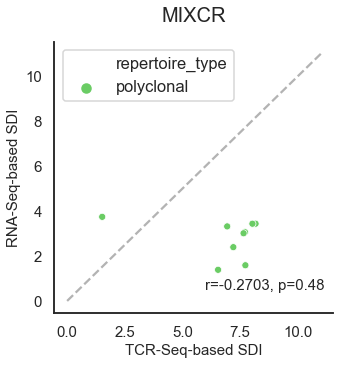

In [9]:
# MIXCR
T_cell_poor_MIXCR = T_cell_poor.loc[(T_cell_poor['tool'] == 'MIXCR')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=50, data=T_cell_poor_MIXCR,palette=['#6acc64'])
g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")
    
g.axes.set_title('MIXCR',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
sns.despine()
 
r, p = stats.pearsonr(T_cell_poor_MIXCR['shannon_index_TCR'], T_cell_poor_MIXCR['shannon_index_tool'])
plt.text(6,0.5,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS6_a1.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS6_a1.png",bbox_inches="tight")

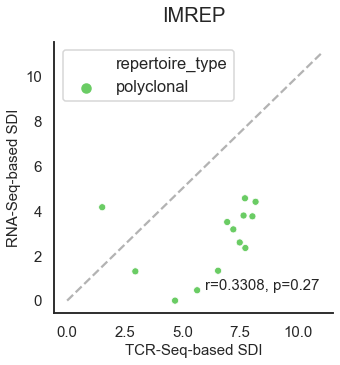

In [10]:
# IMREP
T_cell_poor_IMREP = T_cell_poor.loc[(T_cell_poor['tool'] == 'IMREP')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=50, data=T_cell_poor_IMREP,palette=['#6acc64'])
g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")
    
g.axes.set_title('IMREP',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
sns.despine()
 
r, p = stats.pearsonr(T_cell_poor_IMREP['shannon_index_TCR'], T_cell_poor_IMREP['shannon_index_tool'])
plt.text(6,0.5,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS6_a2.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS6_a2.png",bbox_inches="tight")

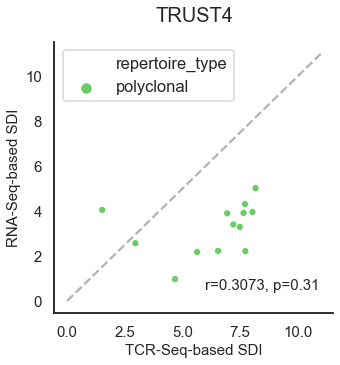

In [11]:
# TRUST4
T_cell_poor_TRUST4 = T_cell_poor.loc[(T_cell_poor['tool'] == 'TRUST4')]
f, ax = plt.subplots(figsize=(5, 5))
g = sns.set_style("white") 
g = sns.set_context("talk") 
g = sns.scatterplot(x='shannon_index_TCR', y='shannon_index_tool', hue='repertoire_type', s=50, data=T_cell_poor_TRUST4,palette=['#6acc64'])
g = sns.lineplot(x=range(0,12),y=range(0,12),color=".7")
g.lines[0].set_linestyle("--")
    
g.axes.set_title('TRUST4',fontsize=20,y=1.05)
g.set_xlabel("TCR-Seq-based SDI",fontsize=15)
g.set_ylabel("RNA-Seq-based SDI",fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
sns.despine()
 
r, p = stats.pearsonr(T_cell_poor_TRUST4['shannon_index_TCR'], T_cell_poor_TRUST4['shannon_index_tool'])
plt.text(6,0.5,'r={:.4f}, p={:.2g}'.format(r, p),fontsize=15)

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS6_a3.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS6_a3.png",bbox_inches="tight")

Absolute error of SDI in T cell rich tissues

In [12]:
mean_absolute_error = T_cell_rich['absolute_error'].mean()
print("Mean")
display(mean_absolute_error)

mean_absolute_error_std = T_cell_rich['absolute_error'].std()
print("STD")
display(mean_absolute_error_std)

mean_absolute_error_tool = T_cell_rich.groupby("tool")["absolute_error"].agg(["mean", "std"])
display(mean_absolute_error_tool)

Mean


2.0828926468771307

STD


1.9285393254500893

,mean,std
tool,,
IMREP,1.917580,1.719708
MIXCR,2.515544,2.519936
TRUST4,1.815554,1.660249


Absolute error of SDI in different classes of repertoires

In [13]:
mean_repertoire_absolute_error = df_combined.groupby("class")["absolute_error"].agg(["mean", "std"])
display(mean_repertoire_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:  
    print(tool)
    df_tool = df_combined.loc[df_combined['tool'] == tool]
    mean_repertoire_absolute_error = df_tool.groupby("class")["absolute_error"].agg(["mean", "std"]) 
    display(mean_repertoire_absolute_error)

,mean,std
class,,
T_cell_poor_monoclonal,0.631787,0.069360
T_cell_poor_polyclonal,3.944897,1.165676
T_cell_rich_monoclonal,0.536683,0.539731
T_cell_rich_polyclonal,3.242550,1.768416


MIXCR


,mean,std
class,,
T_cell_poor_monoclonal,0.615752,0.099843
T_cell_poor_polyclonal,4.508950,1.077323
T_cell_rich_monoclonal,0.141408,0.117840
T_cell_rich_polyclonal,4.296145,1.681364


IMREP


,mean,std
class,,
T_cell_poor_monoclonal,0.640302,0.065495
T_cell_poor_polyclonal,4.012572,1.101935
T_cell_rich_monoclonal,0.814811,0.679551
T_cell_rich_polyclonal,2.744656,1.865142


TRUST4


,mean,std
class,,
T_cell_poor_monoclonal,0.639308,0.066374
T_cell_poor_polyclonal,3.486723,1.179376
T_cell_rich_monoclonal,0.653830,0.564431
T_cell_rich_polyclonal,2.686848,1.714251


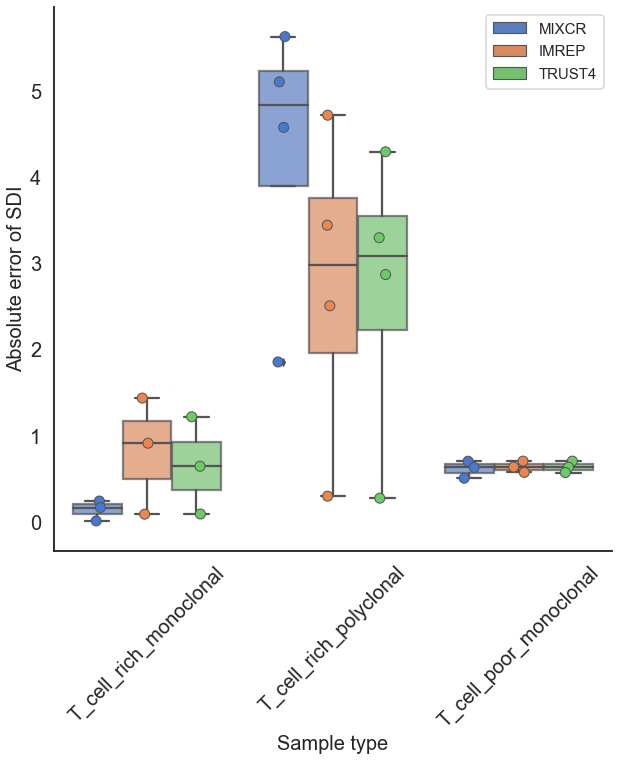

In [14]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
fig = df_combined.loc[(df_combined['class'] != 'T_cell_poor_polyclonal')]
ax = sns.boxplot(x='class',y='absolute_error',data=fig,palette="muted",hue='tool',boxprops=dict(alpha=0.7),
                order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_monoclonal'])
sns.stripplot(x="class",y="absolute_error",data=fig,s=10,color=".3",palette="muted",hue='tool',dodge=True,
              linewidth=1,order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_monoclonal'])
ax.set_xlabel('Sample type',fontsize=20)
ax.set_ylabel('Absolute error of SDI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
plt.show()

fig = ax.get_figure()

fig.savefig("../figures/main/figure2_b.pdf",bbox_inches="tight")
fig.savefig("../figures/main/figure2_b.png",bbox_inches="tight")

Absolute error of SDI in different tissue types among polyclonal repertoires

In [15]:
polyclonal_repertoires = df_combined.loc[(df_combined['repertoire_type'] == 'polyclonal')]

In [16]:
mean_tissue_absolute_error = polyclonal_repertoires.groupby("tissue")["absolute_error"].agg(["mean", "std"]) 
display(mean_tissue_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    print(tool)
    df_tool = polyclonal_repertoires.loc[polyclonal_repertoires['tool'] == tool]
    mean_tissue_absolute_error = df_tool.groupby("tissue")["absolute_error"].agg(["mean", "std"]) 
    display(mean_tissue_absolute_error)

,mean,std
tissue,,
PBMC,3.216246,1.997815
kidney,3.293777,1.901000
lymph_node,3.321462,1.105723
melanoma,4.119417,0.966870
small_intestine,3.734630,0.803423


MIXCR


,mean,std
tissue,,
PBMC,4.201202,2.046067
lymph_node,4.580975,NaN
melanoma,4.491219,1.150302
small_intestine,4.650803,NaN


IMREP


,mean,std
tissue,,
PBMC,2.822716,2.276307
kidney,3.907126,1.957398
lymph_node,2.510478,NaN
melanoma,4.143538,0.864360
small_intestine,3.150218,NaN


TRUST4


,mean,std
tissue,,
PBMC,2.624819,2.094016
kidney,2.680428,2.018540
lymph_node,2.872934,NaN
melanoma,3.764805,0.857962
small_intestine,3.402869,NaN


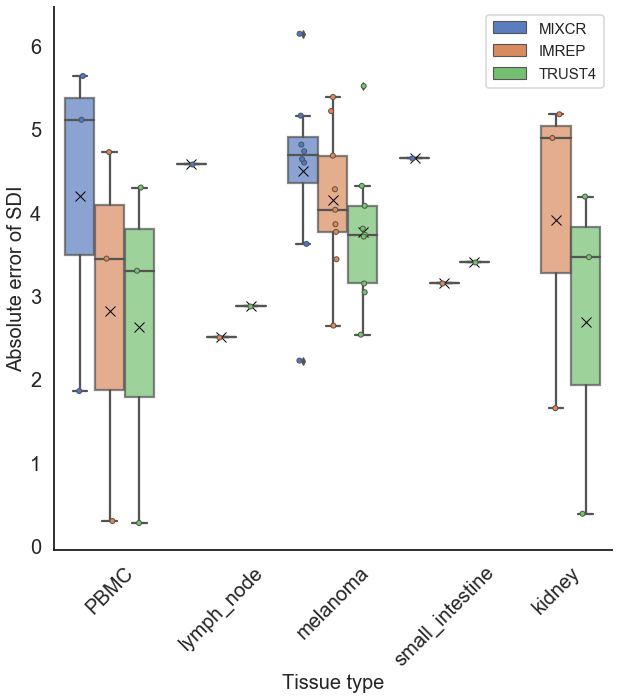

In [20]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x='tissue',y='absolute_error',data=polyclonal_repertoires,palette="muted",hue='tool',
                order=['PBMC','lymph_node','melanoma','small_intestine','kidney'],boxprops=dict(alpha=.7),showmeans=True,
                 meanprops={"marker":"x","markeredgecolor":"black","markersize":"10"})
sns.stripplot(x="tissue",y="absolute_error",data=polyclonal_repertoires,s = 5,color=".3",palette="muted",hue='tool',
              dodge=True,linewidth=1,order=['PBMC','lymph_node','melanoma','small_intestine','kidney'])
ax.set_xlabel('Tissue type',fontsize=20)
ax.set_ylabel('Absolute error of SDI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
plt.show()

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS2_a.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS2_a.png",bbox_inches="tight")

Absolute error of normalized SDI in T cell rich tissues

In [21]:
mean_repertoire_absolute_error = df.groupby("class")["normalized_absolute_error"].agg(["mean", "std"])
display(mean_repertoire_absolute_error)
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools:
    print(tool)
    df_tool = df.loc[df['tool'] == tool]
    mean_clonotype_tool = df_tool.groupby("class")["normalized_absolute_error"].agg(["mean", "std"]) 
    display(mean_clonotype_tool)

,mean,std
class,,
T_cell_poor_polyclonal,0.143478,0.113680
T_cell_rich_monoclonal,0.063502,0.064747
T_cell_rich_polyclonal,0.056316,0.044407


MIXCR


,mean,std
class,,
T_cell_poor_polyclonal,0.153529,0.122182
T_cell_rich_monoclonal,0.015382,0.011468
T_cell_rich_polyclonal,0.050898,0.040766


IMREP


,mean,std
class,,
T_cell_poor_polyclonal,0.165713,0.126200
T_cell_rich_monoclonal,0.099028,0.082162
T_cell_rich_polyclonal,0.068678,0.060566


TRUST4


,mean,std
class,,
T_cell_poor_polyclonal,0.115997,0.097975
T_cell_rich_monoclonal,0.076097,0.065437
T_cell_rich_polyclonal,0.049373,0.039917


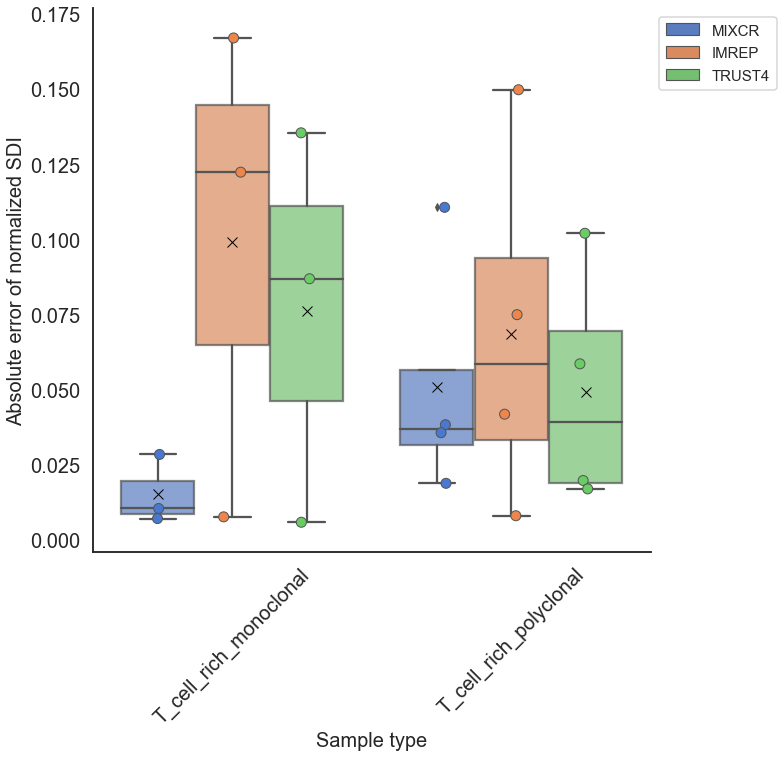

In [22]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))
ax = sns.boxplot(x='class',y='normalized_absolute_error',data=T_cell_rich,palette="muted",hue='tool',
                 boxprops=dict(alpha=0.7),order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'],showmeans=True,
                 meanprops={"marker":"x","markeredgecolor":"black","markersize":"10"})
sns.stripplot(x="class",y="normalized_absolute_error",data=T_cell_rich,s=10,color=".3",palette="muted",hue='tool',dodge=True,
              linewidth=1,order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal'])
ax.set_xlabel('Sample type',fontsize=20)
ax.set_ylabel('Absolute error of normalized SDI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()
plt.show()

fig = ax.get_figure()

fig.savefig("../figures/supplementary/figureS2_b.pdf",bbox_inches="tight")
fig.savefig("../figures/supplementary/figureS2_b.png",bbox_inches="tight")